In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/dataset/winequality-red_(2).csv')

In [ ]:
data.shape

(1599, 12)

In [ ]:
data.info


<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [ ]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data['quality'].unique()


array([5, 6, 7, 4, 8, 3])

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


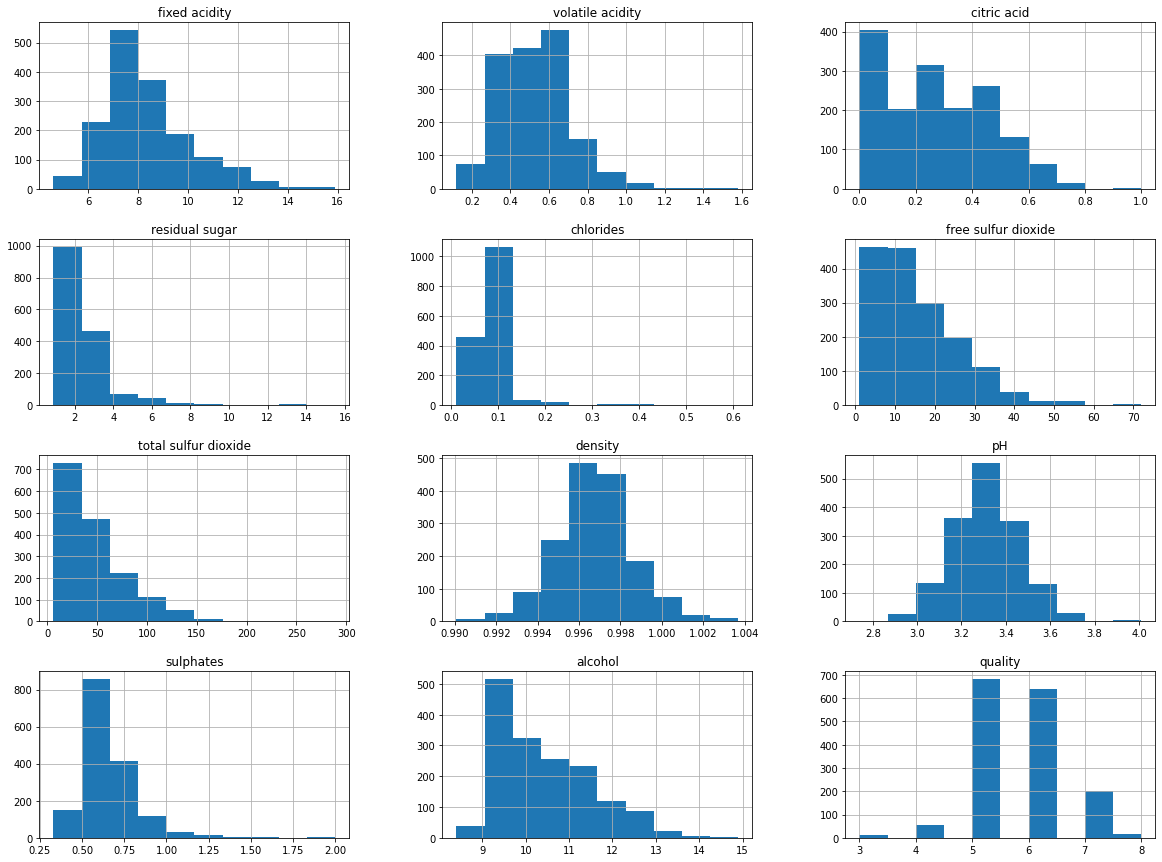

In [ ]:
freqgraph=data.select_dtypes(include=['int32','int64','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

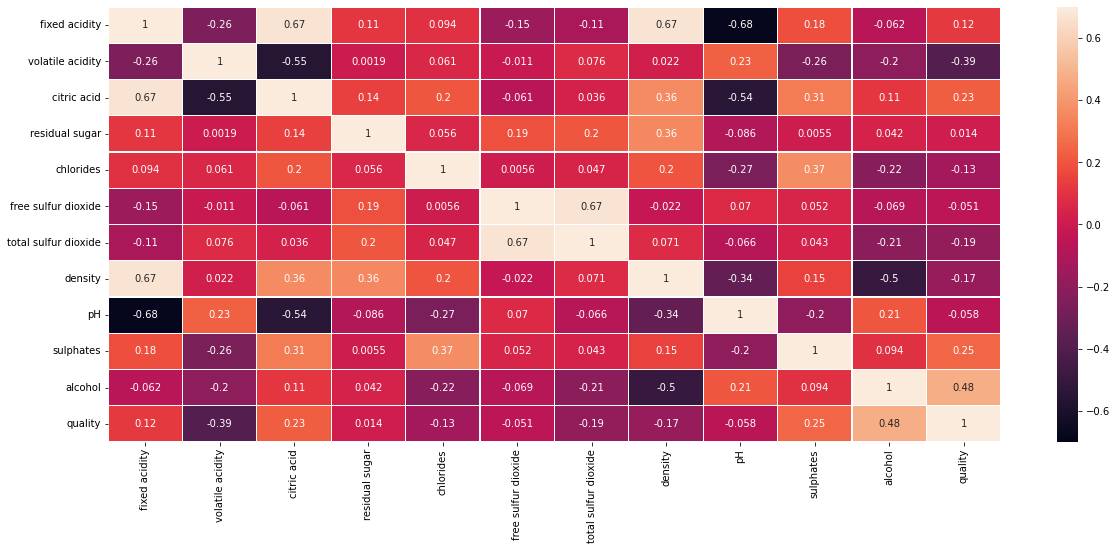

In [ ]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-.7,vmax=0.7,annot=True,linewidths=0.2)


In [ ]:
data.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
data1=data.drop(['fixed acidity','density','free sulfur dioxide'],axis=1)
data1.columns

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
y=data1['quality']
x=data1.drop(['quality'],axis=1)


In [ ]:
x.shape

(1599, 8)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)


In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()


In [ ]:
model=lr.fit(x_train,y_train)

In [ ]:
predictions=model.predict(x_test)

In [ ]:
print(y_test)

803     6
124     5
350     6
682     5
1326    6
       ..
1565    6
327     5
254     6
322     5
1160    7
Name: quality, Length: 400, dtype: int64


In [ ]:
print(predictions)

[5.36573498 5.07721369 5.60698274 5.39140074 5.72969707 5.21333352
 5.09687179 5.13821023 5.75687072 5.69698188 6.1597745  5.26198819
 5.54418606 5.20924318 5.41559645 6.49914113 5.20021116 5.59170724
 6.59225973 5.31259464 5.45007367 5.18916904 5.98702503 6.42238211
 5.36569034 5.43228543 6.39936141 5.39404074 5.16299376 6.17266341
 5.28343432 5.59746345 5.78576466 5.38225279 5.45861267 5.06846554
 6.18787978 5.72387681 5.62119428 6.2126     5.49319541 5.29621209
 6.19518032 5.2264394  5.85454011 5.82197098 6.42923069 5.57184348
 5.16874304 5.586664   5.15379748 5.10317495 5.61548557 6.45194053
 5.02201755 5.06598232 6.01545709 5.49104996 5.84592793 5.26518367
 5.63978429 5.98036776 5.27944843 5.34903789 6.43413819 5.37562983
 6.3607748  5.31080635 6.49376965 5.29196656 6.45490511 4.76722094
 5.80564046 5.84684295 6.1955758  5.30011142 6.80702574 5.86425989
 6.15637682 6.48774906 5.35459331 6.46061466 5.36391195 5.73485395
 5.68839601 6.32331397 5.30570103 5.85001562 6.32379254 5.2510

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))